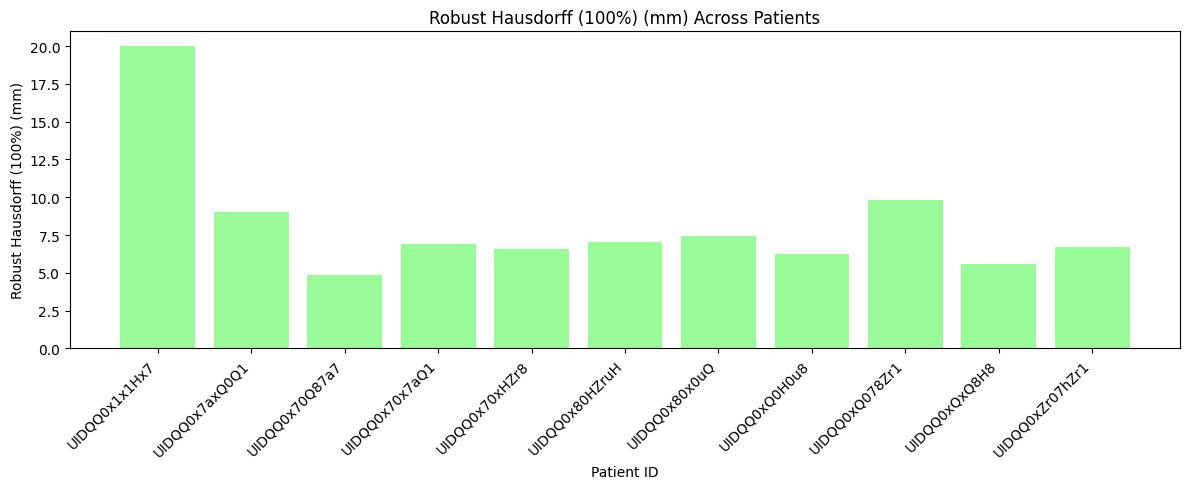

In [3]:
#bar chart
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")  # change path if needed

# Choose the metric you want to plot
#metric = 'Average Surface Distance: Pred->GT (mm)'
# Examples of other metrics you can switch to:
metric = 'Robust Hausdorff (100%) (mm)'
# metric = 'Surface Dice at 1mm'
# metric = 'Surface Overlap at 1mm (GT)'

plt.figure(figsize=(12, 5))
plt.bar(df['Patient ID'], df[metric], color = 'palegreen')
plt.xticks(rotation=45, ha='right')
plt.ylabel(metric)
plt.xlabel('Patient ID')
plt.title(f'{metric} Across Patients')
plt.tight_layout()
plt.show()


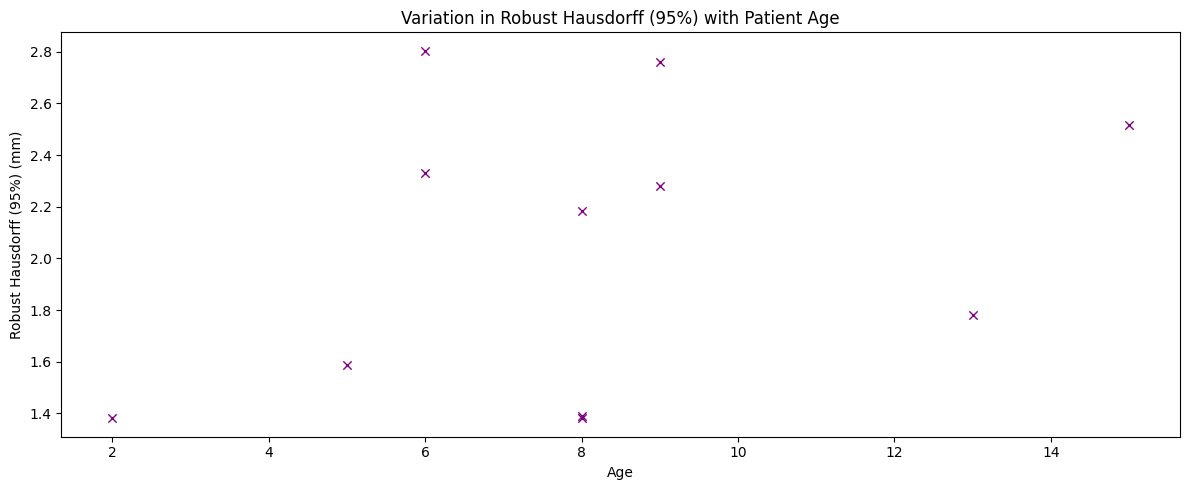

In [46]:
#scatter plot
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")  # change path if needed

# Choose the metric you want to plot
age = 'Age'
#metric = 'Average Surface Distance: Pred->GT (mm)'
# Examples of other metrics you can switch to:
metric = 'Robust Hausdorff (95%) (mm)'
# metric = 'Surface Dice at 1mm'
#metric = 'Surface Overlap at 1mm (Pred)'

plt.figure(figsize=(12, 5))
plt.scatter(df[age], df[metric], color = 'purple', marker='x', linewidth=1)
plt.ylabel(metric)
plt.xlabel(age)
plt.title(f'Variation in Robust Hausdorff (95%) with Patient Age')
plt.tight_layout()
plt.show()


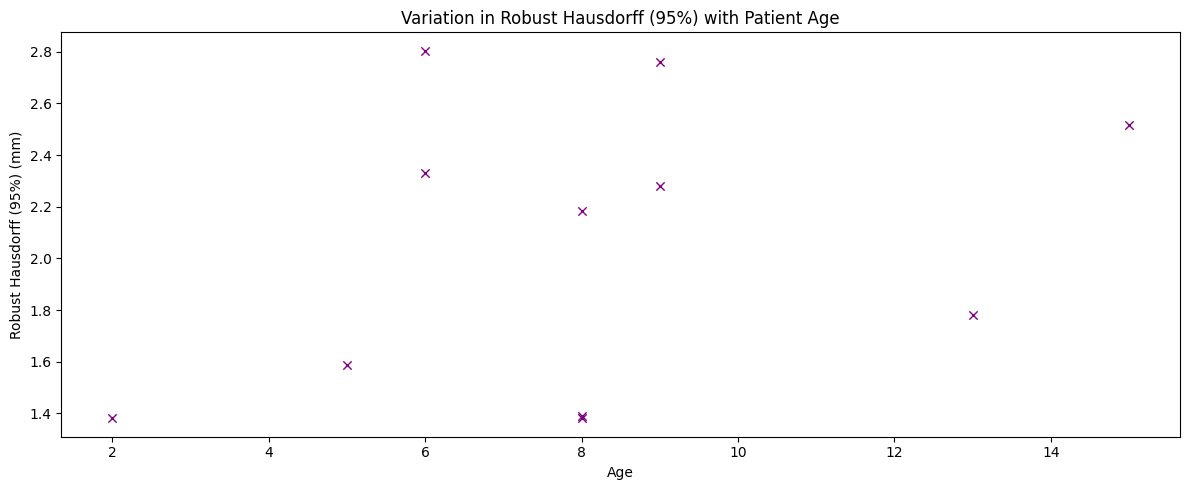

Detected outliers:
Empty DataFrame
Columns: [Patient ID, Age, Robust Hausdorff (95%) (mm)]
Index: []


In [47]:
#circle outliers
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")

age = 'Age'
metric = 'Robust Hausdorff (95%) (mm)'
id_col = 'Patient ID'  

Q1 = df[metric].quantile(0.25)
Q3 = df[metric].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[metric] < lower_bound) | (df[metric] > upper_bound)]
df_no_outliers = df[(df[metric] >= lower_bound) & (df[metric] <= upper_bound)]

plt.figure(figsize=(12, 5))
plt.scatter(df[age], df[metric], color='purple', marker='x', linewidth=1)

for _, row in outliers.iterrows():
    plt.scatter(row[age], row[metric], facecolors='none', edgecolors='blue', s=200, linewidth=2)
    plt.text(row[age] + 0.1, row[metric], f"{row[id_col]}", fontsize=9, color='blue')

plt.ylabel(metric)
plt.xlabel(age)
plt.title('Variation in Robust Hausdorff (95%) with Patient Age')
plt.tight_layout()
plt.show()

print("Detected outliers:")
print(outliers[[id_col, age, metric]])


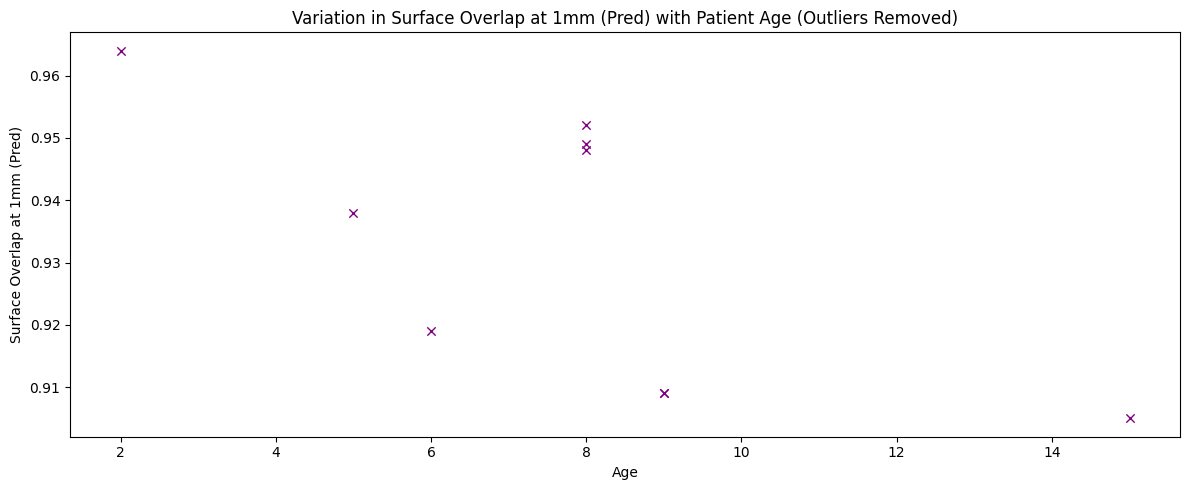

Excluded outliers:
       Patient ID  Age  Surface Overlap at 1mm (Pred)
7   UIDQQ0xQ0H0u8   13                          0.818
8  UIDQQ0xQ078Zr1    6                          0.731


In [43]:
#plot without outliers
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")

age = 'Age'
metric = 'Surface Overlap at 1mm (Pred)'
id_col = 'Patient ID'

# --- Detect outliers using IQR ---
Q1 = df[metric].quantile(0.25)
Q3 = df[metric].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[metric] < lower_bound) | (df[metric] > upper_bound)]

df_no_outliers = df[(df[metric] >= lower_bound) & (df[metric] <= upper_bound)]

plt.figure(figsize=(12, 5))
plt.scatter(df_no_outliers[age], df_no_outliers[metric], color='purple', marker='x', linewidth=1)

plt.ylabel(metric)
plt.xlabel(age)
plt.title('Variation in Surface Overlap at 1mm (Pred) with Patient Age (Outliers Removed)')
plt.tight_layout()
plt.show()

print("Excluded outliers:")
print(outliers[[id_col, age, metric]])


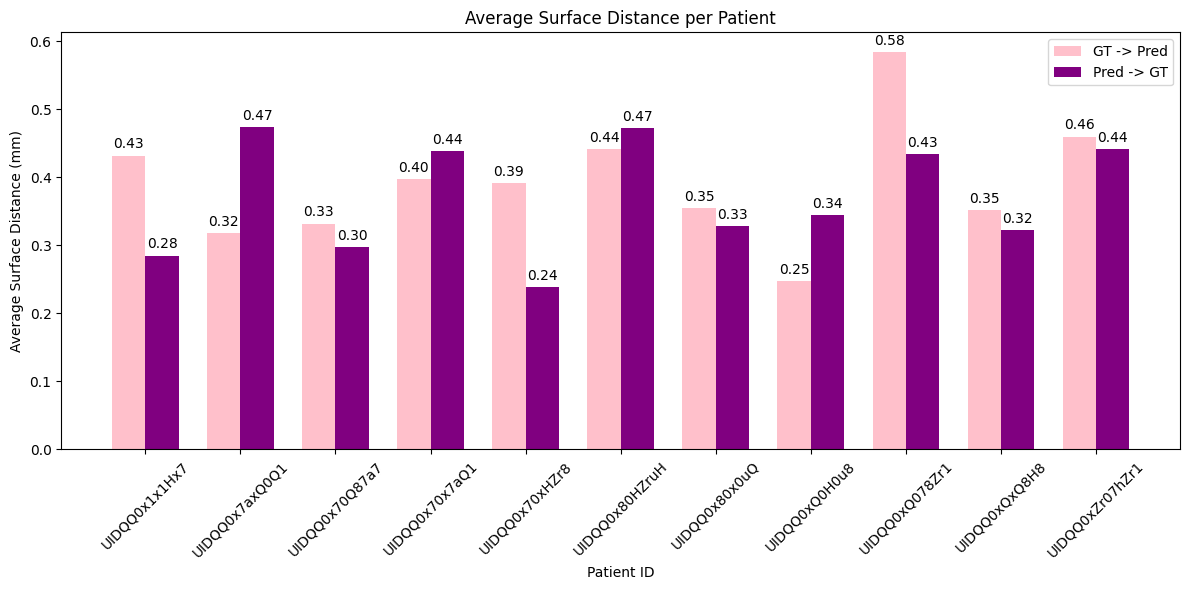

In [4]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")

# Extract data
patients = df['Patient ID']
asd_gt_to_pred = df['Average Surface Distance: GT->Pred (mm)']
asd_pred_to_gt = df['Average Surface Distance: Pred->GT (mm)']

# X-axis positions
x = np.arange(len(patients))
width = 0.35  # bar width

# Plot
fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, asd_gt_to_pred, width, label='GT -> Pred', color='pink')
rects2 = ax.bar(x + width/2, asd_pred_to_gt, width, label='Pred -> GT', color='purple')

# Labels and title
ax.set_ylabel('Average Surface Distance (mm)')
ax.set_xlabel('Patient ID')
ax.set_title('Average Surface Distance per Patient')
ax.set_xticks(x)
ax.set_xticklabels(patients, rotation=45)
ax.legend()

# Optional: add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


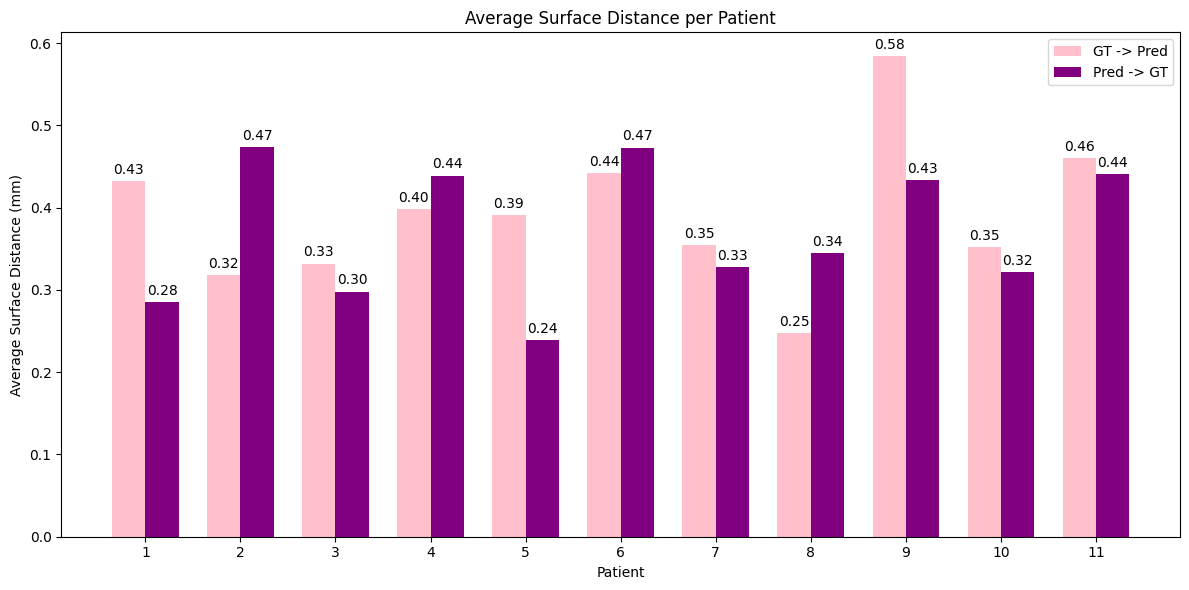

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv(r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")

# Extract data
patients = df['Patient ID']
asd_gt_to_pred = df['Average Surface Distance: GT->Pred (mm)']
asd_pred_to_gt = df['Average Surface Distance: Pred->GT (mm)']

# X-axis positions: simple numbering 1..N
x = np.arange(1, len(patients)+1)
width = 0.35  # bar width

# Plot
fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, asd_gt_to_pred, width, label='GT -> Pred', color='pink')
rects2 = ax.bar(x + width/2, asd_pred_to_gt, width, label='Pred -> GT', color='purple')

# Labels and title
ax.set_ylabel('Average Surface Distance (mm)')
ax.set_xlabel('Patient')
ax.set_title('Average Surface Distance per Patient')
ax.set_xticks(x)  # keep numbers 1..N
ax.legend()

# Optional: add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


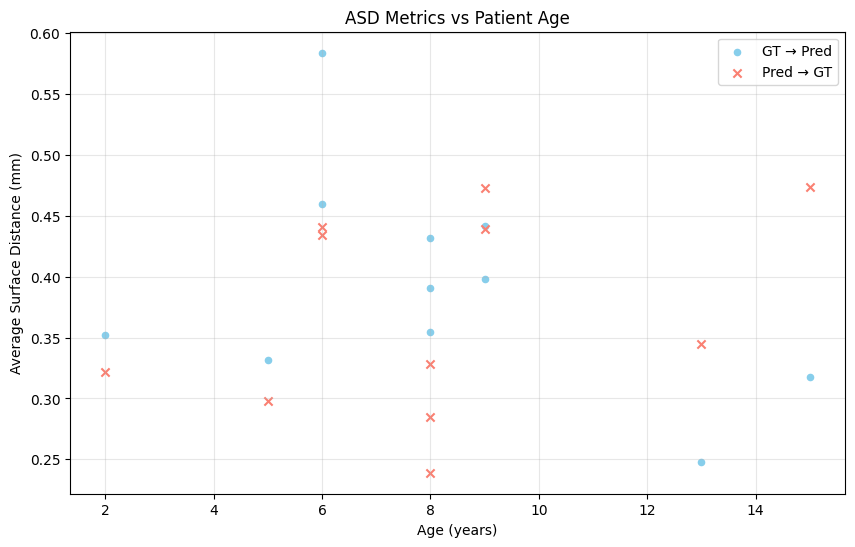

In [40]:
import matplotlib.pyplot as plt

ages = df['Age']

plt.figure(figsize=(10,6))
plt.scatter(ages, asd_gt_to_pred, color='skyblue', label='GT → Pred', marker='o', s=20)
plt.scatter(ages, asd_pred_to_gt, color='salmon', label='Pred → GT', marker='x', s=35)

plt.xlabel('Age (years)')
plt.ylabel('Average Surface Distance (mm)')
plt.title('ASD Metrics vs Patient Age')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Abigail Crowther\OneDrive - The University of Manchester\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")
numeric_cols = df.select_dtypes(include='number').columns

means = df.groupby('Breathing Tube')[numeric_cols].mean()
sems = df.groupby('Breathing Tube')[numeric_cols].sem()

# Create formatted table: "mean ± sem"
formatted = means.copy().astype(str)
for col in numeric_cols:
    formatted[col] = means[col].round(4).astype(str) + " ± " + sems[col].round(4).astype(str)

formatted

,Age,Average Surface Distance: GT->Pred (mm),Average Surface Distance: Pred->GT (mm),Robust Hausdorff (100%) (mm),Robust Hausdorff (95%) (mm),Surface Overlap at 1mm (GT),Surface Overlap at 1mm (Pred),Surface Dice at 1mm
Breathing Tube,,,,,,,,
No,9.3333 ± 1.6055,0.3927 ± 0.0486,0.3848 ± 0.0352,9.4955 ± 2.2214,2.0585 ± 0.229,0.8645 ± 0.0402,0.8755 ± 0.0346,0.87 ± 0.0373
Yes,6.25 ± 1.5478,0.4002 ± 0.0223,0.3602 ± 0.0491,6.4432 ± 0.2931,2.164 ± 0.2884,0.9132 ± 0.0106,0.9352 ± 0.0128,0.924 ± 0.0111


In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Abigail Crowther\OneDrive - The University of Manchester\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv")
numeric_cols = df.select_dtypes(include='number').columns

means = df[numeric_cols].mean()
sems = df[numeric_cols].sem()

formatted = means.copy().astype(str)
for col in numeric_cols:
    formatted[col] = means[col].round(4).astype(str) + " ± " + sems[col].round(4).astype(str)

formatted


Age                                        8.0909 ± 1.0825
Average Surface Distance: GT->Pred (mm)     0.392 ± 0.0267
Average Surface Distance: Pred->GT (mm)    0.3707 ± 0.0252
Robust Hausdorff (100%) (mm)               8.1962 ± 1.2508
Robust Hausdorff (95%) (mm)                2.0362 ± 0.1667
Surface Overlap at 1mm (GT)                 0.8888 ± 0.023
Surface Overlap at 1mm (Pred)               0.9038 ± 0.021
Surface Dice at 1mm                        0.8963 ± 0.0219
dtype: object

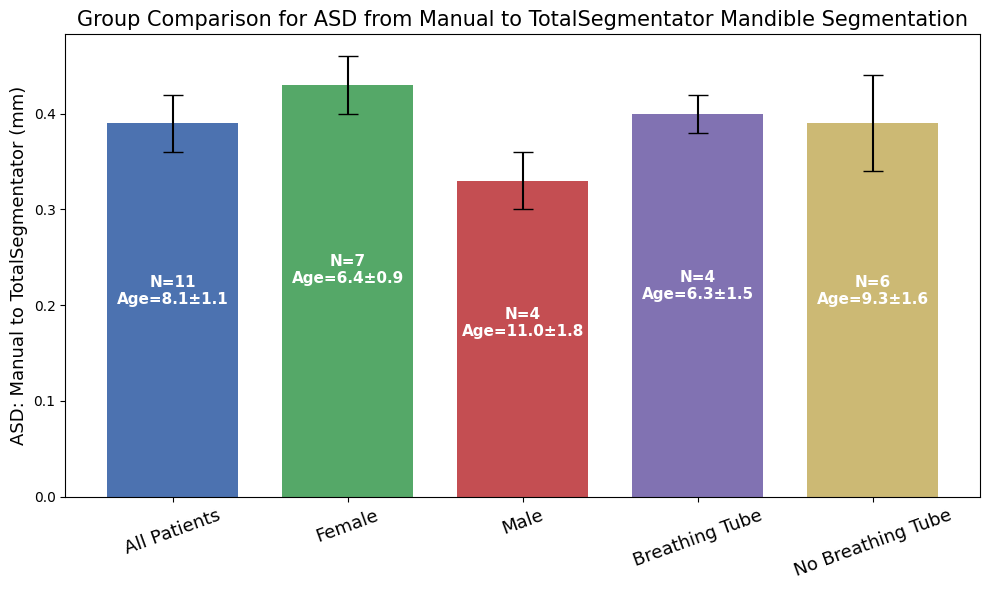

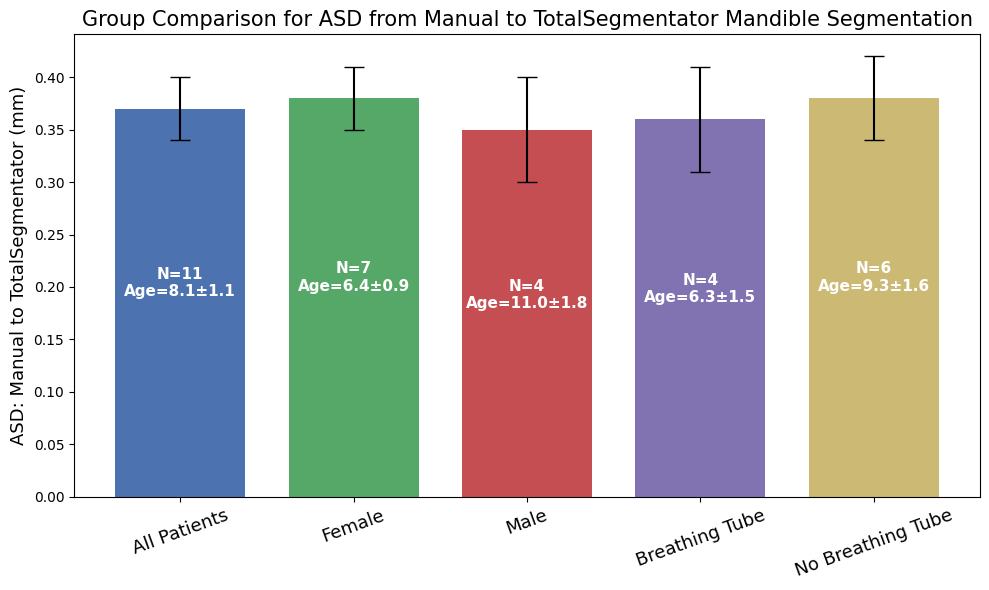

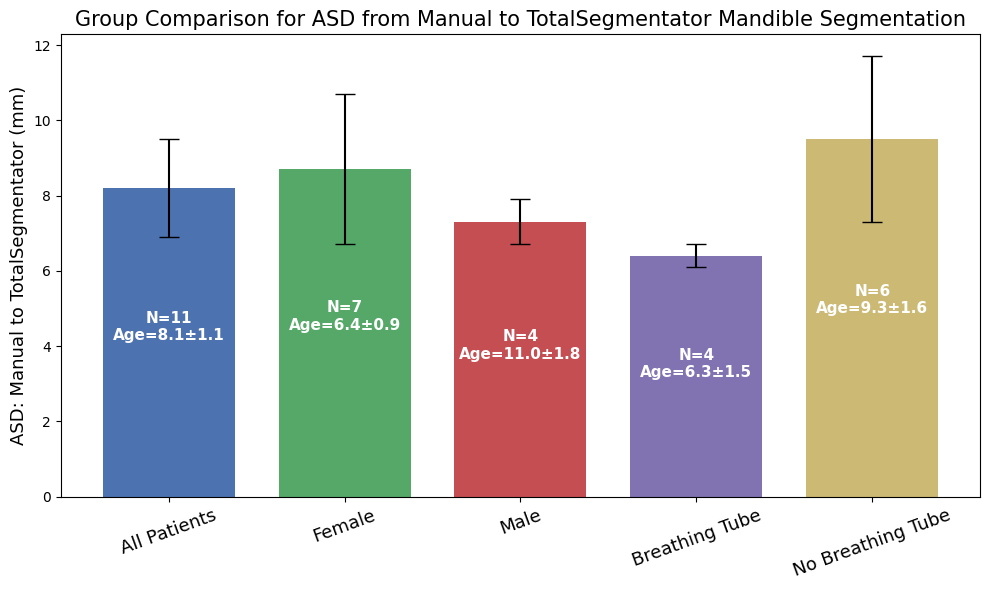

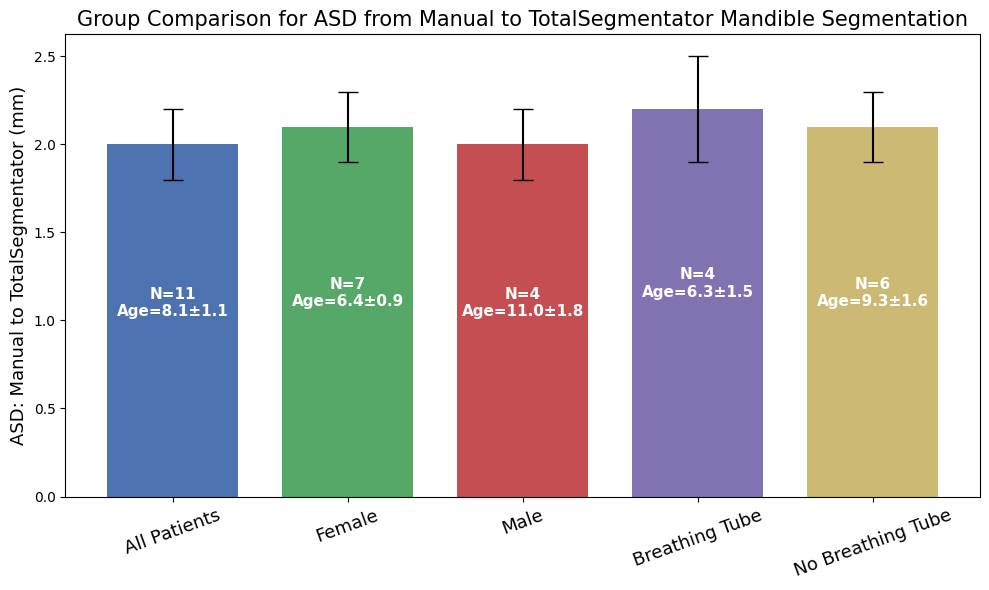

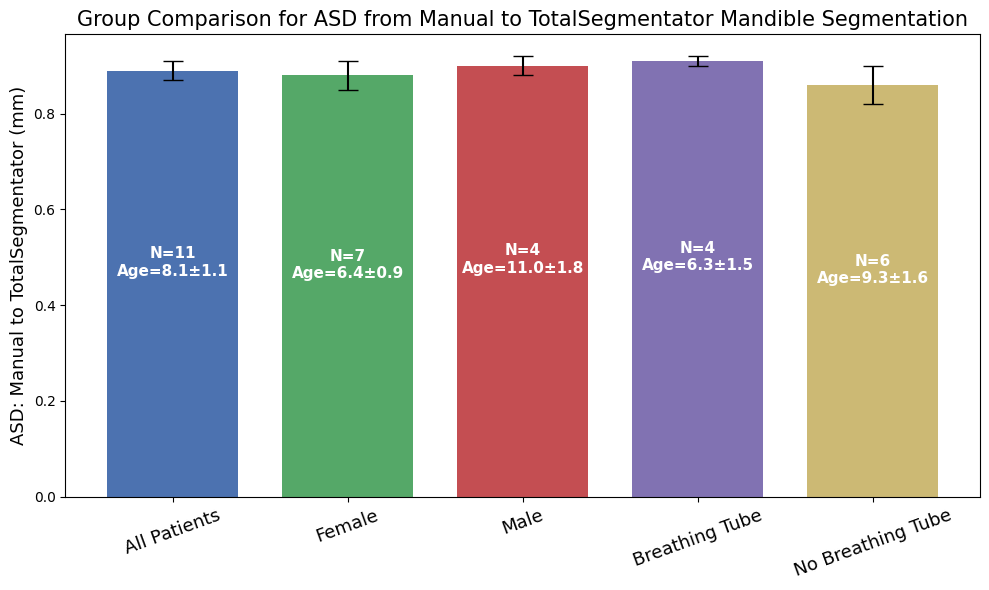

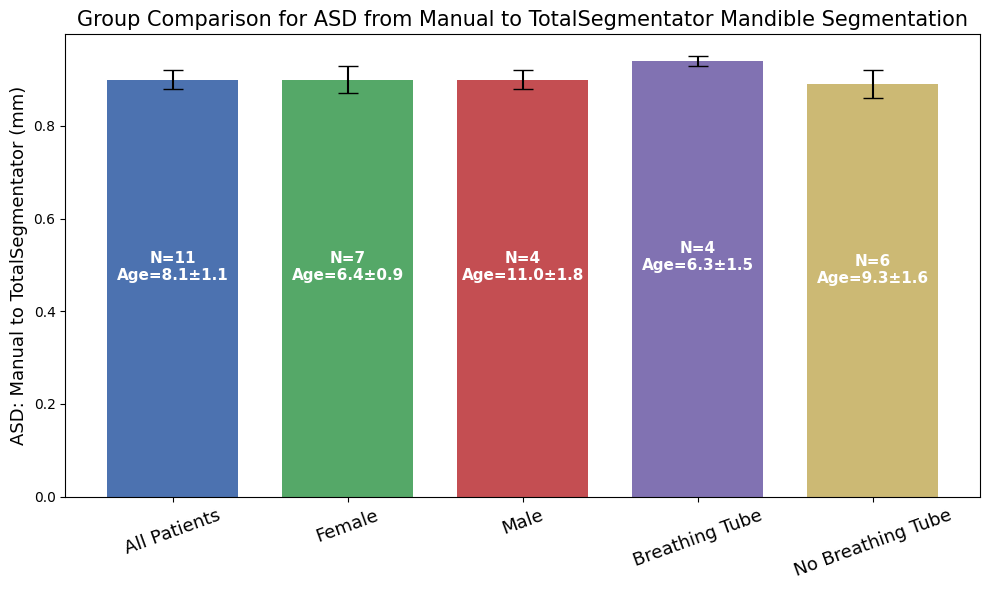

In [15]:
import numpy as np
import matplotlib.pyplot as plt

groups = ["All Patients", "Female", "Male", "Breathing Tube", "No Breathing Tube"]

N_values = [11, 7, 4, 4, 6]
Age_means = [8.1, 6.4, 11.0, 6.3, 9.3]
Age_sems  = [1.1, 0.9, 1.8, 1.5, 1.6]

metrics = {
    "Average Surface Distance (GT→Pred) (mm)": {
        "mean": [0.39, 0.43, 0.33, 0.40, 0.39],
        "sem":  [0.03, 0.03, 0.03, 0.02, 0.05]
    },
    "Average Surface Distance (Pred→GT) (mm)": {
        "mean": [0.37, 0.38, 0.35, 0.36, 0.38],
        "sem":  [0.03, 0.03, 0.05, 0.05, 0.04]
    },
    "Robust Hausdorff (100%) (mm)": {
        "mean": [8.2, 8.7, 7.3, 6.4, 9.5],
        "sem":  [1.3, 2.0, 0.6, 0.3, 2.2]
    },
    "Robust Hausdorff (95%) (mm)": {
        "mean": [2.0, 2.1, 2.0, 2.2, 2.1],
        "sem":  [0.2, 0.2, 0.2, 0.3, 0.2]
    },
    "Surface Overlap at 1 mm (GT)": {
        "mean": [0.89, 0.88, 0.90, 0.91, 0.86],
        "sem":  [0.02, 0.03, 0.02, 0.01, 0.04]
    },
    "Surface Overlap at 1 mm (Pred)": {
        "mean": [0.90, 0.90, 0.90, 0.94, 0.89],
        "sem":  [0.02, 0.03, 0.02, 0.01, 0.03]
    }
}

bar_colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974"]

def plot_metric(metric_label, means, sems):
    x = np.arange(len(groups))
    width = 0.75

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.bar(x, means, yerr=sems, capsize=7, width=width, color=bar_colors)

    ax.set_ylabel('ASD: Manual to TotalSegmentator (mm)', fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(groups, rotation=20, ha="center", fontsize=13)
    ax.set_title(f"Group Comparison for ASD from Manual to TotalSegmentator Mandible Segmentation", fontsize=15)

    ax.grid(False)

    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height * 0.55,
            f"N={N_values[i]}\nAge={Age_means[i]:.1f}±{Age_sems[i]:.1f}",
            ha='center', va='center', color='white', fontsize=11, weight='bold'
        )

    plt.tight_layout()
    plt.show()

for metric_name, data in metrics.items():
    plot_metric(metric_name, data["mean"], data["sem"])


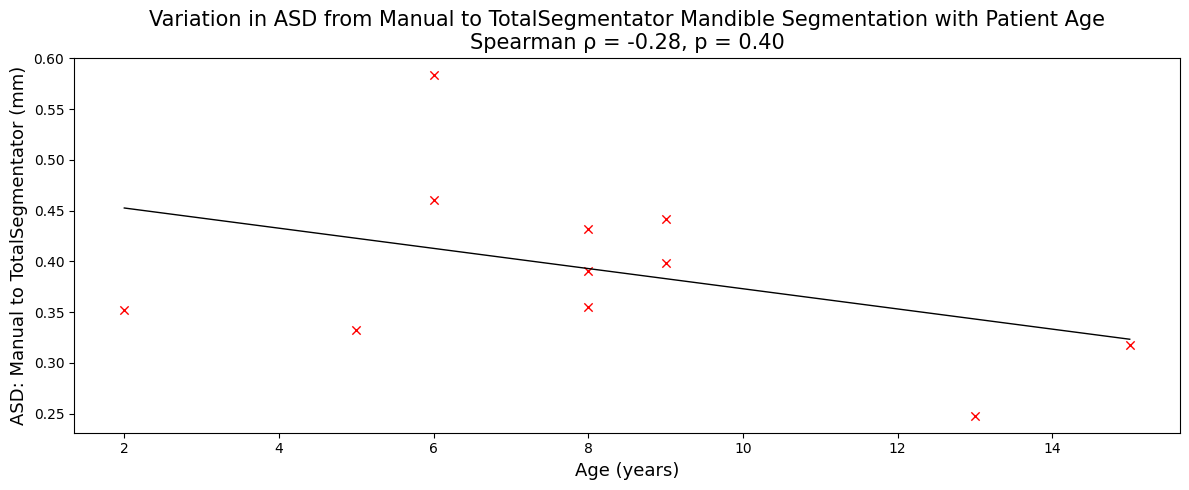

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import spearmanr

df = pd.read_csv(
    r"D:\Users\Abigail Crowther\Desktop\Uni\Year 4\MPhys Projects\Semester 1 - Modelling Facial Deformation\Documents\surface_distance_metrics_rhabdo_no_outliers.csv"
)

age_col = 'Age'
#metric = 'Robust Hausdorff (100%) (mm)'
# Examples:
metric = 'Average Surface Distance: GT->Pred (mm)'
#metric = 'Surface Overlap at 1mm (GT)'

x = df[age_col].values
y = df[metric].values

rho, p_spear = spearmanr(x, y)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = intercept + slope * x_fit

plt.figure(figsize=(12, 5))
plt.scatter(x, y, color='red', marker='x', linewidth=1)
plt.plot(x_fit, y_fit, color='black', linewidth=1)

plt.xlabel('Age (years)', fontsize=13)
plt.ylabel('ASD: Manual to TotalSegmentator (mm)', fontsize=13)
plt.title(f'Variation in ASD from Manual to TotalSegmentator Mandible Segmentation with Patient Age\n'
          f'Spearman ρ = {rho:.2f}, p = {p_spear:.2f}', fontsize = 15)

plt.tight_layout()
plt.show()


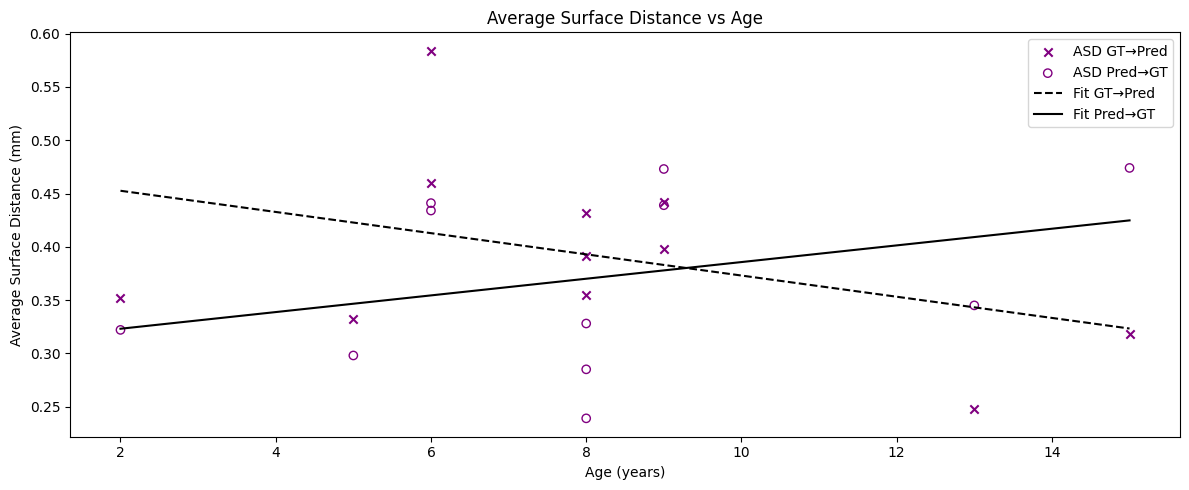

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = df['Age']

y1 = df['Average Surface Distance: GT->Pred (mm)']
y2 = df['Average Surface Distance: Pred->GT (mm)']

# Regression lines (visual only)
s1, i1, *_ = linregress(x, y1)
s2, i2, *_ = linregress(x, y2)

x_fit = np.linspace(x.min(), x.max(), 100)

plt.figure(figsize=(12,5))
plt.scatter(x, y1, marker='x', color='purple', label='ASD GT→Pred')
plt.scatter(x, y2, marker='o', facecolors='none', edgecolors='purple', label='ASD Pred→GT')

plt.plot(x_fit, i1 + s1*x_fit, linestyle='--', color='black', label='Fit GT→Pred')
plt.plot(x_fit, i2 + s2*x_fit, linestyle='-', color='black', label='Fit Pred→GT')

plt.xlabel('Age (years)')
plt.ylabel('Average Surface Distance (mm)')
plt.title('Average Surface Distance vs Age')
plt.legend()
plt.tight_layout()
plt.show()
